# Cross response functions and average log return by average trade sign plot

In [1]:
from matplotlib import pyplot as plt
import os

import pickle

%matplotlib inline

In [2]:
def cross_response_avg_return_avg_trade_plot(ticker_i, ticker_j, days, t_step):
    """
    Plot the cross response and the avg return and trade  during an interval
    of time (days) in independent plots in a figure to compare the behavior of
    both results. The data is loaded from the cross response data results and
    the average return and average trade sign data results.
        :param ticker_i: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param ticker_j: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param days: string with the days to be analized
         (i.e ['07', '08', '09'])
        :param t_step: time step in the data in ms
    """

    plt.figure(figsize=(9, 16))
    plt.subplots_adjust(hspace=0, wspace=0)

    for i, day in enumerate(days):

        print('Processing data for the stock ' + ticker_i + ' and the stock '
              + ticker_j + ' the day ' + day + ' March, 2016')

        cross = pickle.load(open(
         '../Data/cross_response_data_{}ms/cross_201603{}_{}i_{}j_{}ms.pickl'
         .format(t_step, day, ticker_i, ticker_j, t_step), 'rb'))
        avg = pickle.load(open(
         '../Data/avg_return_sign_data_{}ms/avg_201603{}_{}i_{}j_{}ms.pickl'
         .format(t_step, day, ticker_i, ticker_j, t_step), 'rb'))

        plt.subplot(len(days), 2, 2*i+1)
        plt.semilogx(cross, '-g', label='Stock i {} and stock j {} - {}'
                     .format(ticker_i, ticker_j, day))
        plt.xlabel(r'Time lag $[\tau]$')
        plt.ylabel(r'Cross response $ R_{ij} (\tau) $')
        plt.legend(loc='best')
        plt.title('Cross - {}i - {}j - {}ms'
                  .format(ticker_i, ticker_j, t_step))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        plt.grid(True)
        plt.tight_layout()

        plt.subplot(len(days), 2, 2*i+2)
        plt.semilogx(avg, '-g', label='Stock i {} and stock j {} - {}'
                     .format(ticker_i, ticker_j, day))
        plt.xlabel(r'Time lag $[\tau]$')
        plt.ylabel("".join((r'$ \left \langle r_{i}\left ( t, \tau \right )'
                   + r'\right \rangle \left \langle \epsilon_{j} \left ( t'
                   + r'\right ) \right \rangle $').split()))
        plt.legend(loc='best')
        plt.title('Avg - {}i - {}j - {}ms'
                  .format(ticker_i, ticker_j, t_step))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        plt.grid(True)
        plt.tight_layout()

    if (not os.path.isdir(
     '../Data/cross_response_avg_return_avg_trade_plot_{}ms/'
     .format(t_step))):
            os.mkdir('../Data/cross_response_avg_return_avg_trade_plot_{}ms/'
                     .format(t_step))
            print('Folder to save plot created')

    plt.savefig("".join((
                '../Data/cross_response_avg_return_avg_trade_plot_{}ms/'
                + 'cross_response_avg_comparison_{}_{}_{}ms.png').split())
                .format(t_step, ticker_i, ticker_j, t_step))

    return None

In [7]:
# Using the AAPL stock
ticker_i = 'AAPL'
ticker_j = 'MSFT'
days = ['07', '08', '09', '10', '11']
t_step = 1000

Processing data for the stock AAPL and the stock MSFT the day 07 March, 2016
Processing data for the stock AAPL and the stock MSFT the day 08 March, 2016
Processing data for the stock AAPL and the stock MSFT the day 09 March, 2016
Processing data for the stock AAPL and the stock MSFT the day 10 March, 2016
Processing data for the stock AAPL and the stock MSFT the day 11 March, 2016


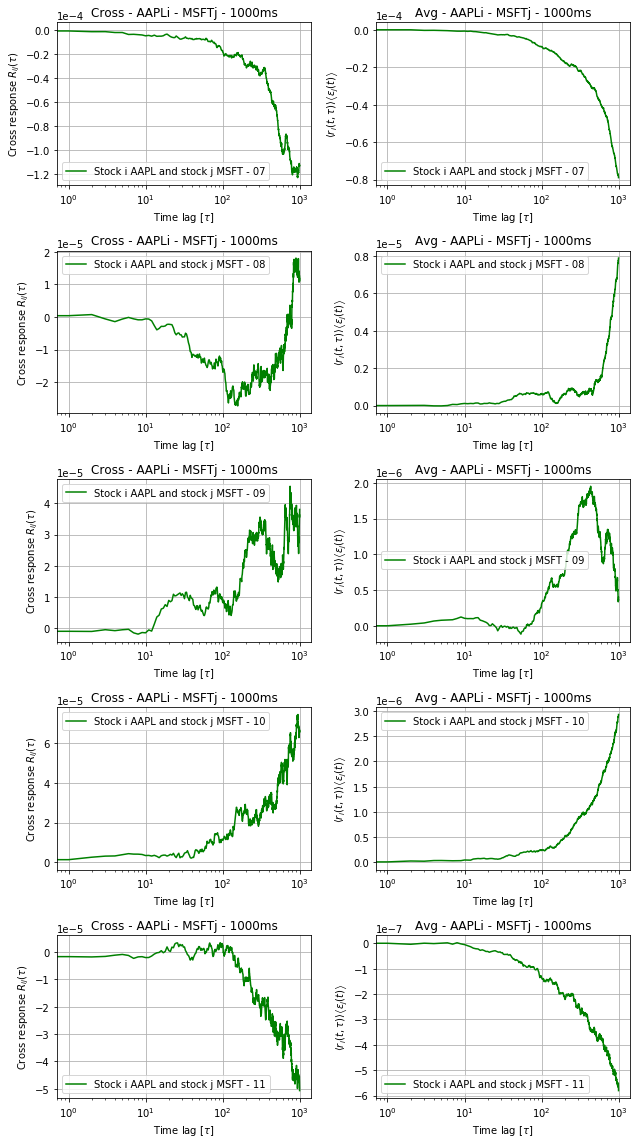

In [8]:
cross_response_avg_return_avg_trade_plot(ticker_i, ticker_j, days, t_step)